# Lesson 23 - CIFAR-10 Cats and Dogs Round 1
Austin Derrow-Pinion

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load CIFAR-10 Cats and Dogs Data Set
CIFAR10 = np.load('./Data/CIFAR-10_cats_dogs.npz')
images = CIFAR10['images']
label_names = CIFAR10['label_names']
labels = np.array(CIFAR10['labels'])

print(label_names)
print('images shape:',images.shape)
print('labels shape:',labels.shape)

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
images shape: (10000, 32, 32, 3)
labels shape: (10000,)


cat


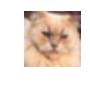

dog


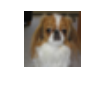

dog


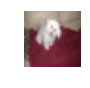

cat


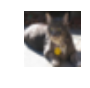

cat


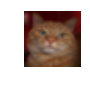

In [4]:
# spot check images and labels
SAMPLE_SIZE = 5
ix = np.random.randint(0,high=images.shape[0],size=SAMPLE_SIZE)
for i in ix:
    plt.figure(figsize = (1,1))
    plt.axis('off')
    plt.imshow(images[i,:,:,:],interpolation=None)
    print('%s' % label_names[labels[i]])
    plt.show()

In [5]:
label_names[labels]

array(['cat', 'cat', 'cat', ..., 'cat', 'cat', 'dog'], 
      dtype='<U10')

In [6]:
# check that cats and dogs categories are balanced
df = pd.DataFrame()
df['labels'] = labels
df['names'] = label_names[labels]
print(df.shape)
df.head()

(10000, 2)


,labels,names
0,3,cat
1,3,cat
2,3,cat
3,3,cat
4,5,dog


In [7]:
# count number of cats and dogs
df.names.value_counts()

dog    5000
cat    5000
Name: names, dtype: int64

In [8]:
# split data into training, validation and testing data sets

# separate cats and dogs
ix_cat = (labels==3)
ix_dog = (labels==5)
images_cat = images[ix_cat,:,:,:]
labels_cat = labels[ix_cat]
images_dog = images[ix_dog,:,:,:]
labels_dog = labels[ix_dog]

# concatenate cats and dogs into training, validation and testing data sets
images_train = np.vstack([images_cat[0:3000,:,:,:],images_dog[0:3000,:,:,:]])
labels_train = np.hstack([labels_cat[0:3000],labels_dog[0:3000]])
images_valid = np.vstack([images_cat[3000:4000,:,:,:],images_dog[3000:4000,:,:,:]])
labels_valid = np.hstack([labels_cat[3000:4000],labels_dog[3000:4000]])
images_test  = np.vstack([images_cat[4000:,:,:,:],images_dog[4000:,:,:,:]])
labels_test  = np.hstack([labels_cat[4000:],labels_dog[4000:]])

# scramble data sets
ix = np.random.permutation(6000)
images_train = images_train[ix,:,:,:]
labels_train = labels_train[ix]
ix = np.random.permutation(2000)
images_valid = images_valid[ix,:,:,:]
labels_valid = labels_valid[ix]
ix = np.random.permutation(2000)
images_test  = images_test[ix,:,:,:]
labels_test  = labels_test[ix]

print('training')
print(images_train.shape)
print(labels_train.shape)
print('validation')
print(images_valid.shape)
print(labels_valid.shape)
print('testing')
print(images_test.shape)
print(labels_test.shape)

training
(6000, 32, 32, 3)
(6000,)
validation
(2000, 32, 32, 3)
(2000,)
testing
(2000, 32, 32, 3)
(2000,)


SPOT CHECK TRAINING DATA:

cat


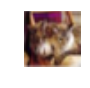

cat


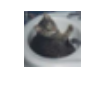

cat


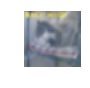

cat


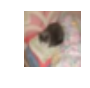

dog


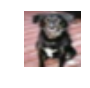

In [12]:
# spot check new data sets

print("SPOT CHECK TRAINING DATA:\n")
SAMPLE_SIZE = 5
ix = np.random.randint(0,high=images_train.shape[0],size=SAMPLE_SIZE)
for i in ix:
    plt.figure(figsize = (1,1))
    plt.axis('off')
    plt.imshow(images_train[i,:,:,:],interpolation=None)
    print('%s' % label_names[labels_train[i]])
    plt.show()

SPOT CHECK VALIDATION DATA:

cat


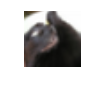

dog


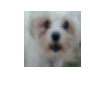

dog


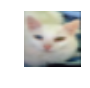

cat


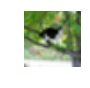

dog


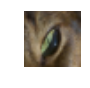

In [13]:
# spot check new data sets

print("SPOT CHECK VALIDATION DATA:\n")
SAMPLE_SIZE = 5
ix = np.random.randint(0,high=images_valid.shape[0],size=SAMPLE_SIZE)
for i in ix:
    plt.figure(figsize = (1,1))
    plt.axis('off')
    plt.imshow(images_train[i,:,:,:],interpolation=None)
    print('%s' % label_names[labels_valid[i]])
    plt.show()

SPOT CHECK TEST DATA:

dog


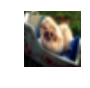

cat


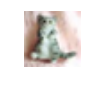

cat


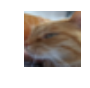

dog


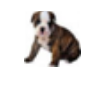

cat


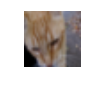

In [14]:
# spot check new data sets

print("SPOT CHECK TEST DATA:\n")
SAMPLE_SIZE = 5
ix = np.random.randint(0,high=images_test.shape[0],size=SAMPLE_SIZE)
for i in ix:
    plt.figure(figsize = (1,1))
    plt.axis('off')
    plt.imshow(images_train[i,:,:,:],interpolation=None)
    print('%s' % label_names[labels_test[i]])
    plt.show()

In [15]:
# save cats and dogs training, validation and testing data sets
SAVE_FILE_NAME = './Data/CIFAR-10_cats_dogs_split'
np.savez_compressed(SAVE_FILE_NAME,
                    label_names=label_names,
                    images_train=images_train,
                    labels_train=labels_train,
                    images_valid=images_valid,
                    labels_valid=labels_valid,
                    images_test=images_test,
                    labels_test=labels_test)